In [1]:
! pip install wordcloud
! pip install nltk
! pip install Pillow
! pip install pymorphy2

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors

from wordcloud import WordCloud

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

from collections import Counter

from PIL import Image

import pymorphy2

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maksimlyara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv('russian_retail.csv')

In [4]:
df

,name,country_origin,domain,price_category,founded,presence_regions,description
0,Tamaris,Германия,Обувь,Средний,1967,Москва; Санкт-Петербург; Барнаул; Бийск; Екате...,Популярный бренд женской обуви и аксессуаров T...
1,100 Столов,Россия,Мебель,Средний,2008,Брянск,"На протяжении 8 лет компания ""100 Столов"" зани..."
2,1000 и одна сумка,Россия,Аксессуары,Средний,2003,Москва; Санкт-Петербург; Анапа; Армавир; Астра...,«1000 и одна сумка» - динамично развивающаяся ...
3,1001 Платье,Россия,Одежда,Средний,2008,Москва; Санкт-Петербург,«1001 Платье» — российский производитель женск...
4,1001 тур,Россия,"Туризм, путешествия",Средний,2002,Москва; Санкт-Петербург; Архангельск; Балашиха...,Компания «1001 Тур» работает с 2002 года. Сейч...
...,...,...,...,...,...,...,...
2469,Яркий,Россия,Товары и услуги для детей,Средний,2011,Москва,"«Яркий» – сеть магазинов, в которых Вы можете ..."
2470,Яркий фотомаркет,Россия,"Сотовые телефоны, электроника, фото",Средний,1995,Москва; Санкт-Петербург; Ростов-на-Дону,Первый магазин по продаже фотоуслуг и фототехн...
2471,Ярмарка Мебели,Россия,Мебель,Средний,2008,Москва; Санкт-Петербург; Астрахань; Барнаул; Б...,ЯРМАРКА МЕБЕЛИ - федеральная сеть мебельных ги...
2472,Ярче!,Россия,Продукты питания,Средний,2012,Москва; Балашиха; Барнаул; Бийск; Видное; Воло...,"«Ярче!» - супермаркеты шаговой доступности, гд..."


## Функция создания облака слов:
Аргументы:
data - колонка датафрейма/словарь (в зависимости от этого нужно регулировать аргумент freq_dict)\
user_specific_words - слова, которые пользователь не хочет лемматизировать (Лемматизация — процесс приведения словоформы к лемме(начальной форме слова))\
user_stopwords - слова, которые не должны находиться в облаке слов (к примеру: "тд", "и", "так"...)\
title_text - заголовок облака слов\
saved_name - имя, с которым будет сохранено изображение облака слов (постфикс напишется автоматически, в зависимости от того, включена ли функция freq_dict)\
words_count - минимальное количество появления слова для того, чтобы оно отразилось в облаке слов\
lemmatize - нужно ли лемматизировать слова (при freq_dict=True значение lemmatize автоматически переходит в False)\
collocation_threshold - Чтобы биграммы считались биграммами, показатель вероятности совпадения Даннинга должен быть больше этого параметра. Значение по умолчанию 30 является произвольным\
freq_dict - True-будет использован словарь с частотой появления слов, False-колонка датафрейма\
log - print визуализированных слов с их "весом"

In [5]:
def get_wordscloud(data, user_specific_words=[], user_stopwords={}, title_text='', saved_name='unnamed.png', words_count = 1, lemmatize = False, collocation_threshold = 20, freq_dict = False, log=False):
    custom_colors = ['#CE2029', '#800020', '#020202', '#0D324D']
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", custom_colors)
    display(data)
    data_new = data.dropna(inplace = False)
    if freq_dict:
        name_postfix = '_dict.png'
        elem_counts = {}

        for row in data_new:
            elements = row.split(',') 
            elements = [elem.strip().lower() for elem in elements]

            for elem in elements:
                if elem in elem_counts:
                    elem_counts[elem] += 1
                else:
                    elem_counts[elem] = 1
        print(elem_counts)

        wordcloud = WordCloud(stopwords=user_stopwords, 
                              width=1920, height=1080, 
                              background_color='white', colormap=cmap,
#                               mask=mask,
                              # contour_width=3, contour_color='steelblue'
#                               random_state=13,
                              prefer_horizontal = 0.95,
#                               collocation_threshold = collocation_threshold,
#                               max_font_size = 500,
#                               min_font_size = 30
                             ).generate_from_frequencies(elem_counts)
    else:
        name_postfix = '_tokenized.png'
        data_new = data_new.values
        combined_text = ','.join(data_new)
        words_tokenized = word_tokenize(combined_text, language='russian')
    #     print(combined_text)
        if lemmatize == True:
            morph = pymorphy2.MorphAnalyzer()
            lemmatized_words = [morph.parse(word)[0].normal_form if word not in user_specific_words else word for word in words_tokenized]
        else:
            lemmatized_words = words_tokenized
        word_counts = Counter(lemmatized_words)
        words = [word for word in lemmatized_words if word_counts[word] >= words_count]
    #     print(words)
        stop_words = set(stopwords.words('russian'))
        stop_words.update(user_stopwords)
    #     print(stop_words)
        filtered_text = ' '.join(words)
        if 'Science/Machine' in filtered_text:
            filtered_text = filtered_text.replace('Science/Machine', 'Science, а, Machine')
    #     print(filtered_text)

        wordcloud = WordCloud(stopwords=stop_words, 
                              width=1920, height=1080, 
                              background_color='white', colormap=cmap,
#                               mask=mask,
                              # contour_width=3, contour_color='steelblue'
                              random_state=42,
                              prefer_horizontal = 0.95,
                              collocation_threshold = collocation_threshold,
                              max_font_size = 300,
                              min_font_size = 40
                             ).generate(filtered_text)


    plt.figure(figsize=(19.2, 10.8))
    ax = plt.axes()

    y_coord = 0.2
    ax.axhline(y=y_coord, color='black', linewidth=2)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title_text, fontsize=25, fontstyle='normal', fontweight='bold')
    plt.axis('off')

    plt.savefig((f'{saved_name}{name_postfix}'), dpi=200, bbox_inches='tight')

    plt.show()
    if log:
         print(wordcloud.words_)

0       Москва; Санкт-Петербург; Барнаул; Бийск; Екате...
1                                                  Брянск
2       Москва; Санкт-Петербург; Анапа; Армавир; Астра...
3                                 Москва; Санкт-Петербург
4       Москва; Санкт-Петербург; Архангельск; Балашиха...
                              ...                        
2469                                               Москва
2470              Москва; Санкт-Петербург; Ростов-на-Дону
2471    Москва; Санкт-Петербург; Астрахань; Барнаул; Б...
2472    Москва; Балашиха; Барнаул; Бийск; Видное; Воло...
2473    Москва; Санкт-Петербург; Алушта; Железнодорожн...
Name: presence_regions, Length: 2474, dtype: object

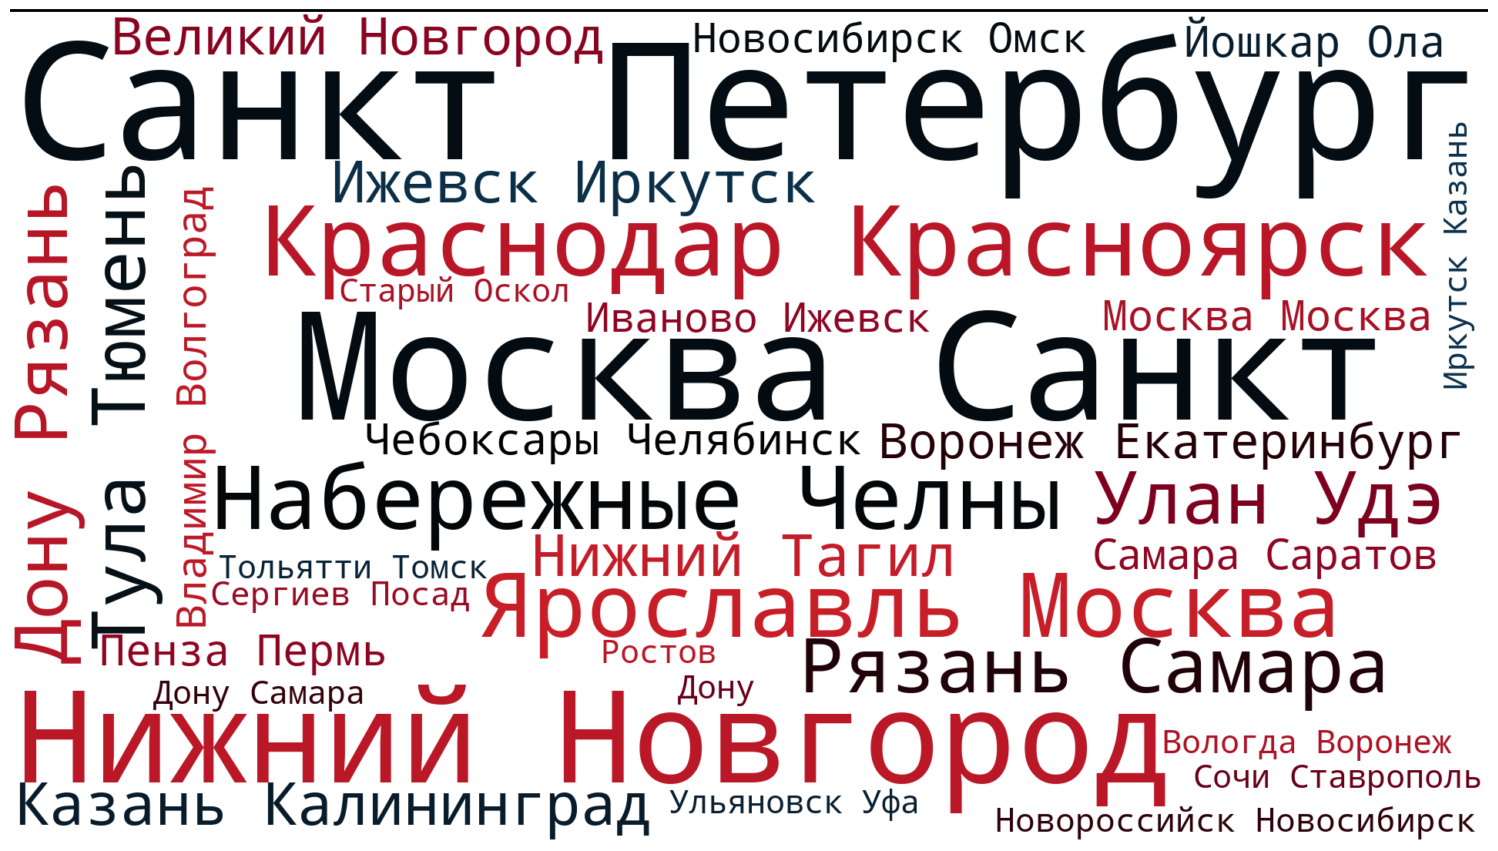

In [6]:
get_wordscloud(df['presence_regions'])

In [7]:
stops_desc = set(['либо','это', 'сеть','а','всё','который',"россия","город", 'г'])

0       Популярный бренд женской обуви и аксессуаров T...
1       На протяжении 8 лет компания "100 Столов" зани...
2       «1000 и одна сумка» - динамично развивающаяся ...
3       «1001 Платье» — российский производитель женск...
4       Компания «1001 Тур» работает с 2002 года. Сейч...
                              ...                        
2469    «Яркий» – сеть магазинов, в которых Вы можете ...
2470    Первый магазин по продаже фотоуслуг и фототехн...
2471    ЯРМАРКА МЕБЕЛИ - федеральная сеть мебельных ги...
2472    «Ярче!» - супермаркеты шаговой доступности, гд...
2473    «ЯСАМ» - это бренд единого стандарта занятий д...
Name: description, Length: 2474, dtype: object

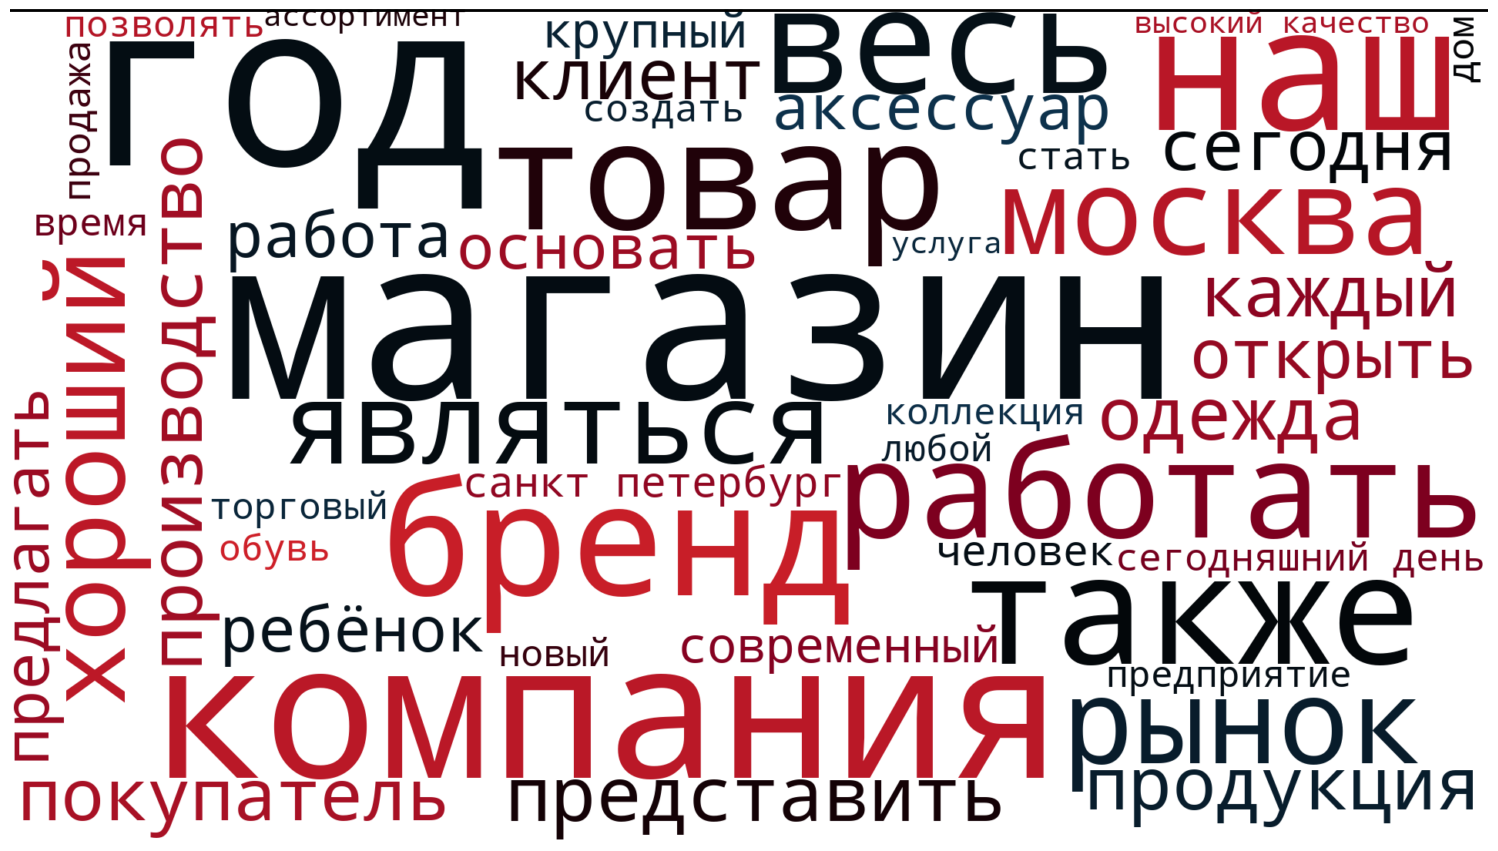

In [8]:
get_wordscloud(df['description'], user_stopwords = stops_desc, lemmatize = True)

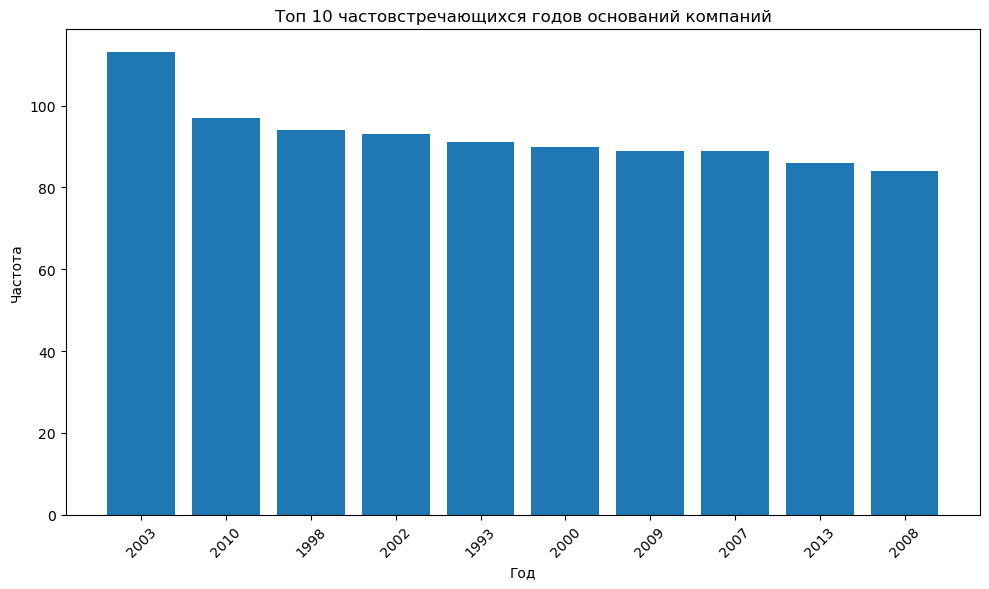

In [9]:
top_10_years = df['founded'].value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_years.index.astype(str), top_10_years.values)
plt.xlabel('Год')
plt.ylabel('Частота')
plt.title('Топ 10 частовстречающихся годов оснований компаний')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the histogram
plt.show()

0                                     Обувь
1                                    Мебель
2                                Аксессуары
3                                    Одежда
4                       Туризм, путешествия
                       ...                 
2469              Товары и услуги для детей
2470    Сотовые телефоны, электроника, фото
2471                                 Мебель
2472                       Продукты питания
2473              Товары и услуги для детей
Name: domain, Length: 2474, dtype: object

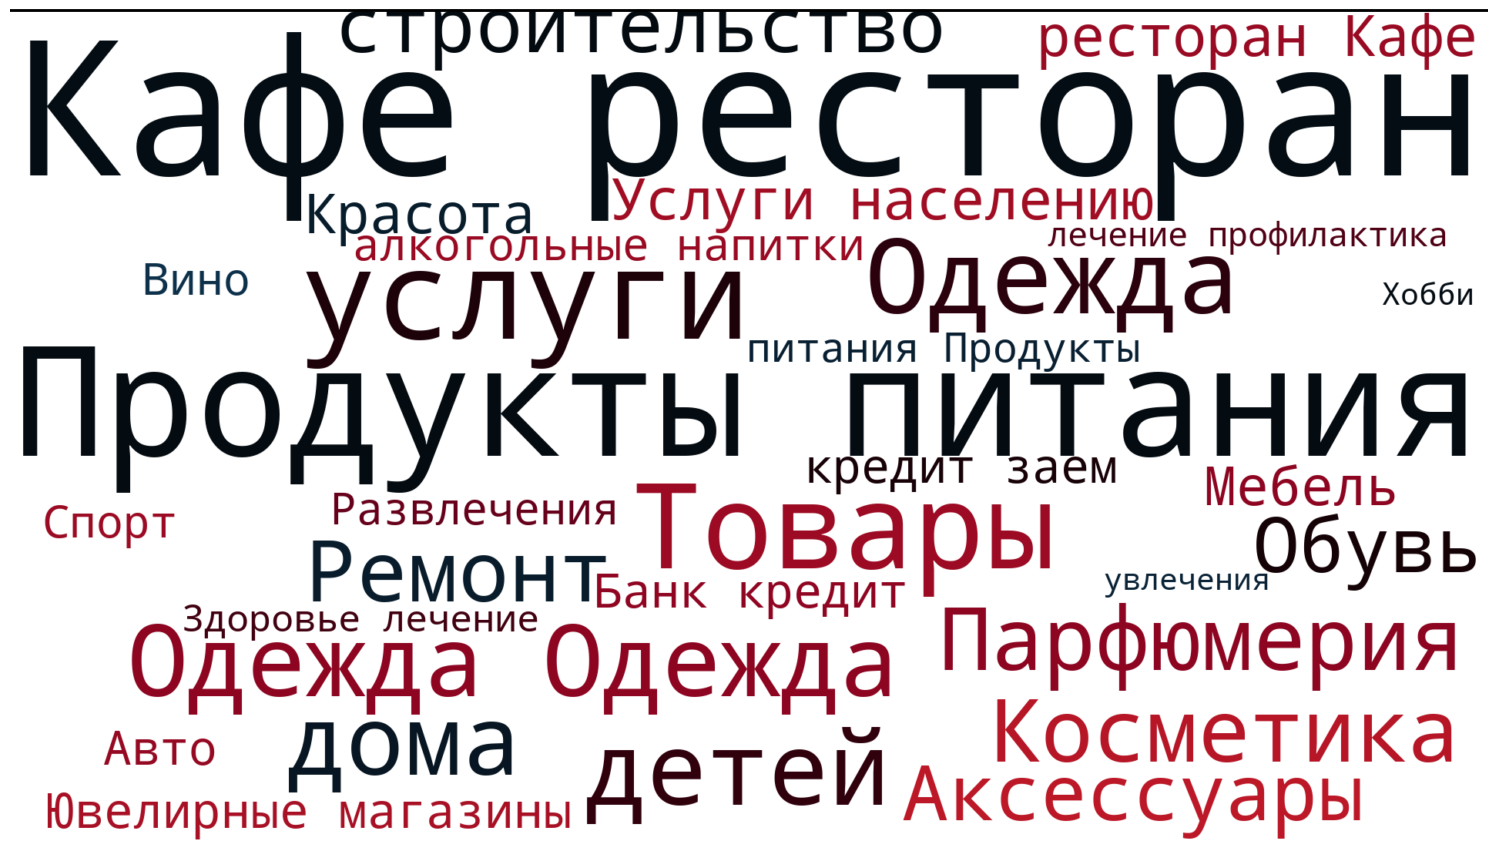

{'Кафе ресторан': 1.0, 'Продукты питания': 0.8108974358974359, 'услуги': 0.5096153846153846, 'Товары': 0.4583333333333333, 'Одежда': 0.34615384615384615, 'детей': 0.3333333333333333, 'Одежда Одежда': 0.3173076923076923, 'дома': 0.30448717948717946, 'Парфюмерия': 0.2467948717948718, 'Косметика': 0.2467948717948718, 'Ремонт': 0.23076923076923078, 'строительство': 0.23076923076923078, 'Аксессуары': 0.22756410256410256, 'Обувь': 0.22435897435897437, 'Услуги населению': 0.22435897435897437, 'ресторан Кафе': 0.22435897435897437, 'Красота': 0.21474358974358973, 'Мебель': 0.20192307692307693, 'Ювелирные магазины': 0.20192307692307693, 'Банк кредит': 0.1987179487179487, 'кредит заем': 0.1987179487179487, 'Авто': 0.19230769230769232, 'Вино': 0.17307692307692307, 'Спорт': 0.17307692307692307, 'алкогольные напитки': 0.17307692307692307, 'Развлечения': 0.16987179487179488, 'питания Продукты': 0.16987179487179488, 'Здоровье лечение': 0.15064102564102563, 'лечение профилактика': 0.15064102564102563, 

In [10]:
get_wordscloud(df['domain'], log = True)

<Axes: >

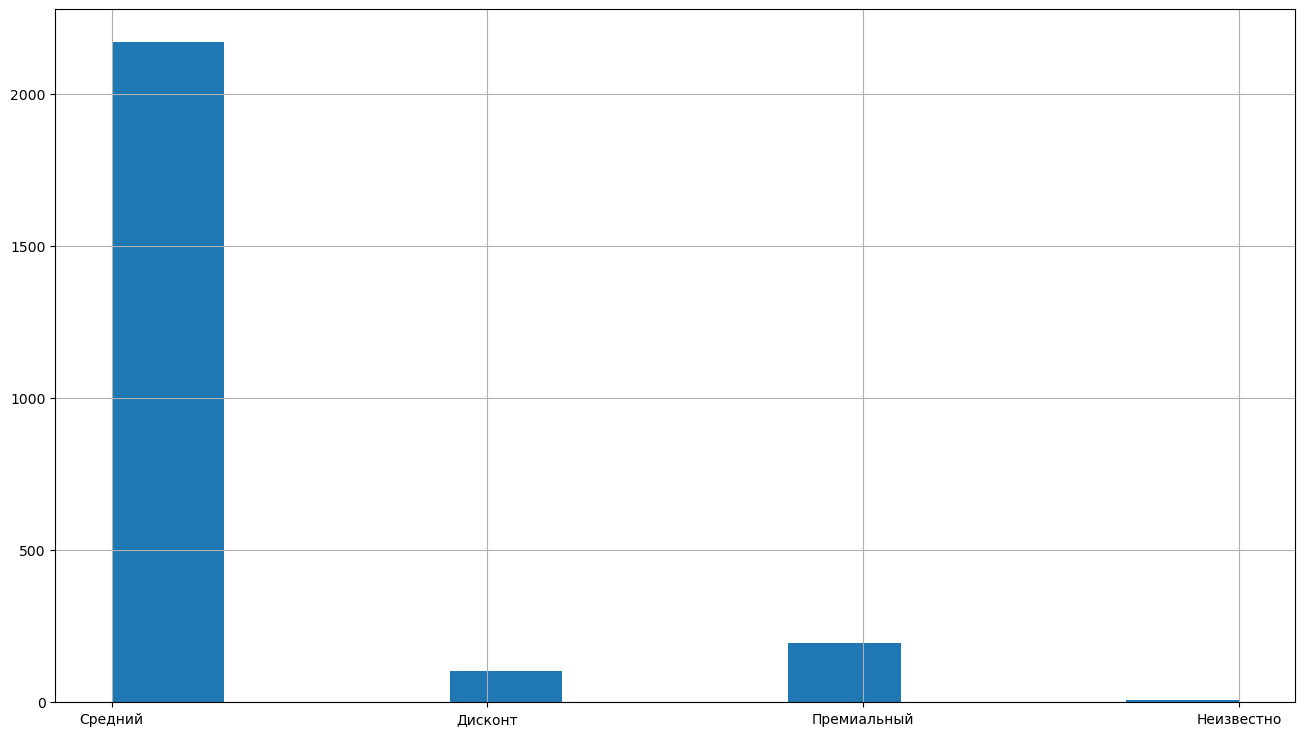

In [11]:
df['price_category'].hist(figsize = (16,9))